<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC2</p>
<p style="margin: 0; text-align:right;">2018-1 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Alumno: <b>Fernando Antonio Barbeiro Campos</b> - <a>fbarbeiro@uoc.edu</a></p>
    
</div>
    
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 2: Métodos no supervisados

A lo largo de esta práctica veremos como aplicar distintas técnicas no supervisadas
así como algunas de sus aplicaciones reales:

 1. **Clustering clásico**: k-means y la regla del codo.
 - **Clustering con formas y feature engineering**.
 - **Reducción de dimensionalidad**: PCA y t-SNE.
 - **Aplicación**: agrupación de documentos.
   
Para ello vamos a necesitar las siguientes librerías:

In [2]:
import random

import numpy as np
import pandas as pd
from sklearn import cluster      # Algoritmos de clustering.
from sklearn import datasets     # Crear datasets.

# Visualizacion.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

%matplotlib inline

## 1. Clustering clásico: k-means y la regla del codo (2 puntos)

Vamos a generar un dataset compuesto por $n$ nubes de puntos, donde $n$ será un número aleatorio entre 2 y 4, usando el módulo ```datasets``` de scikit-learn.

Hay 1500 puntos en 2 dimensiones (repartidos en 4 clusters)


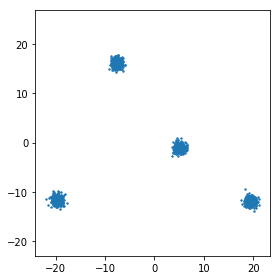

In [3]:
N_SAMPLES = 1500
MIN_CLUSTERS = 2
MAX_CLUSTERS = 4
X, y = datasets.make_blobs(n_samples=N_SAMPLES, # Cuantos puntos
                           n_features=2,        # Cuantas dimensiones
                           centers=random.randint(MIN_CLUSTERS, MAX_CLUSTERS),
                           center_box=(-20, 20),
                           cluster_std=.6)
print('Hay {} puntos en {} dimensiones (repartidos en {} clusters)'.format(X.shape[0], X.shape[1], y.max() + 1))
fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(X[:,0], X[:,1], s=2)
ax.axis('equal')
plt.tight_layout()

Una técnica para estimar $k$ es, como se explica en la teoría:
> Los criterios anteriores (minimización de distancias intra grupo o maximización de distancias inter grupo) pueden usarse para establecer un valor adecuado para el parámetro k. Valores k para los que ya no se consiguen mejoras significativas en la homogeneidad interna de los segmentos o la heterogeneidad entre segmentos distintos, deberían descartarse.

Lo que popularmente se conocer como *regla del codo*.

Primero es necesario calcular la suma de los errores cuadráticos ([*SSE*](https://bl.ocks.org/rpgove/0060ff3b656618e9136b)) que consiste en la suma de todos los errores (distancia de cada punto a su centroide asignado) al cuadrado.

$$SSE = \sum_{i=1}^{K} \sum_{x \in C_i} euclidean(x, c_i)^2$$

Donde $K$ es el número de clusters a buscar por *k-means*, $x \in C_i$ son los puntos que pertenecen a i-ésimo cluster, $c_i$ es el centroide del cluster $C_i$ (al pertenece el punto $x$), y $euclidean$ es la [distancia euclídea](https://en.wikipedia.org/wiki/Euclidean_distance).

Este procedimiento realizado para cada posible valor $k$, resulta en una función monótona decreciente, donde el eje $x$ representa los distintos valores de $k$, y el eje $y$ el $SSE$. Intuitivamente se podrá observar un significativo descenso del error, que indicará el valor idóneo de $k$.

**Se pide realizar la representación gráfica de la regla del codo junto a su interpretación, utilizando la librería ```matplotlib``` y la implementación en scikit-learn de [*k-means*](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> cálculo y visualización de la regla del codo.  
</div>

[234301.78665852256, 62800.20155093883]


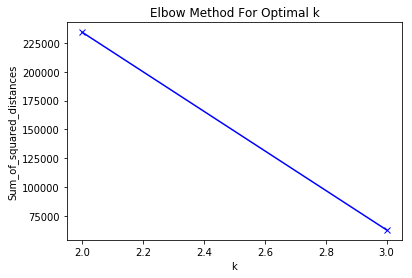

In [4]:
# Hice 3 implementaciones (una siendo un test con un valor más amplio de MAX_CLUSTER)
# voy a explicar todo en el análisis

Sum_of_squared_distances = []

def calculate_and_plot_elbow () :
    K = range(MIN_CLUSTERS, MAX_CLUSTERS)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(X)
        Sum_of_squared_distances.append(km.inertia_)
    
    print(Sum_of_squared_distances)
    plot_elbow(K)

def plot_elbow (K) :
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
calculate_and_plot_elbow()


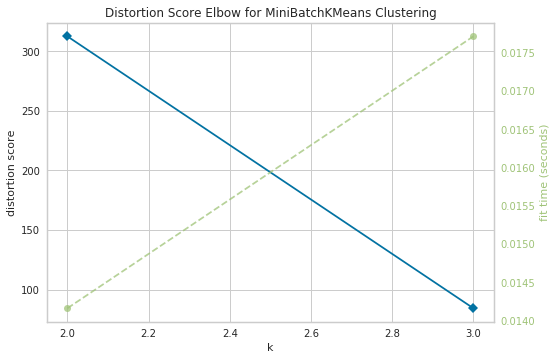

In [5]:
from sklearn.cluster import MiniBatchKMeans

from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(MiniBatchKMeans(), k=(MIN_CLUSTERS, MAX_CLUSTERS))

visualizer.fit(X)
visualizer.poof()

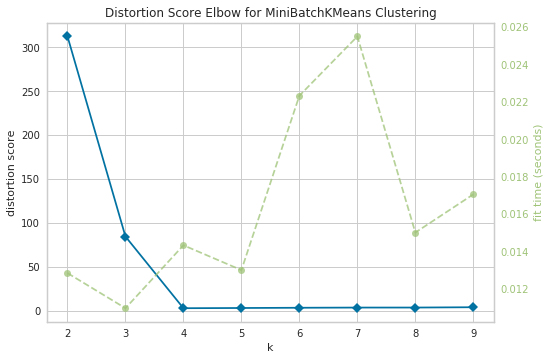

In [6]:
visualizer = KElbowVisualizer(MiniBatchKMeans(), k=(MIN_CLUSTERS, 10))

visualizer.fit(X)
visualizer.poof()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué se interpreta en la gráfica? ¿Cómo podría mejorarse la elección de $k$?.  
</div>

Aquí buscamos la mejor manera de eligir el **número óptimo de Clusters**. 
Como he visto que las presentaciones de los dos primeros gráficos era un poco rara, he decidido profundizar un poco más y aumentar el número máximo de cluster del atributo *K* con el intuito de saber que pasaría con los gráficos.
Teniendo el cuenta que buscamos el punto en que se observa un cambio brusco en la inercia, diría que sería para ese caso en concreto:
 - **K = 3** 

De forma **optativa** se plantea **realizar el apartado anterior con una implementación propia del algoritmo *k-means***.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>[OPCIONAL] Implementación:</strong> algoritmo <i>k-means</i> desde cero.  
</div>

En este caso, con 2 dimensiones, es muy sencillo inferir el número de clusters visualizando los datos. Pero este método es de gran utilidad cuando se cuenta con datos de alta dimensionalidad.

## 2. Clustering con formas y feature engineering (4 puntos)

Pero no todos los datasets son como los del ejercicio anterior. Para esta segunda parte vamos a emplear el siguiente conjunto de datos:

In [7]:
data_circles = ('circles', *datasets.make_circles(n_samples=N_SAMPLES, factor=.5, noise=.05))

Donde *data_circles* es una tupla con tres posiciones: el nombre del dataset y los dos valores devueltos por la función que genera el dataset:

In [8]:
datasets.make_circles?

In [9]:
data_circles

('circles', array([[-0.08701145,  1.05722727],
        [ 0.03001366, -0.49273912],
        [-0.20095647, -1.02260065],
        ...,
        [-0.92839626,  0.44089084],
        [ 0.32752464, -0.39762277],
        [ 0.39431363,  0.32989437]]), array([0, 1, 0, ..., 0, 1, 1]))

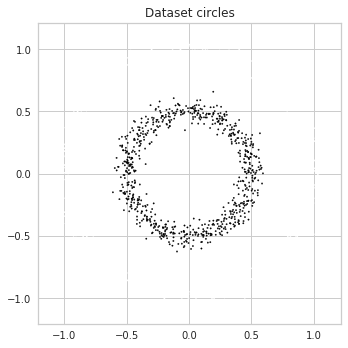

In [10]:

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(data_circles[1][:,0], data_circles[1][:,1], c=data_circles[2], s=2)
ax.set_title('Dataset {}'.format(data_circles[0]))
plt.tight_layout()

### 2 a. Encontrando los clusters con *k-means*

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> aplica la regla del codo para decidir el valor de $k$.
</div>

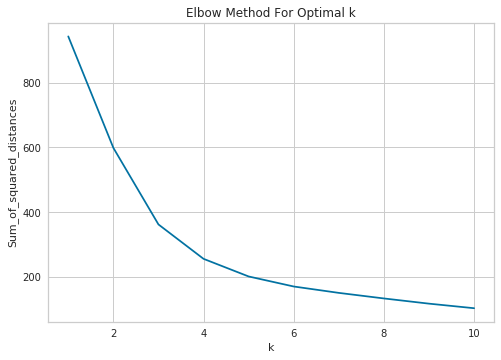

In [11]:
# Repetindo la logica de la misma función que he definido arriba (podría haber optimizado y llamado la misma)
# no lo hice para quedar claro las operaciones aqui
Sum_of_squared_distances_circles = []

def calculate_and_plot_elbow_circles () :
    K = range(1, 11)
    for k in K:
        km = KMeans(n_clusters=k)
        km = km.fit(data_circles[1])
        Sum_of_squared_distances_circles.append(km.inertia_)
    plot_elbow_circles(K)

def plot_elbow_circles (K) :
    plt.plot(K, Sum_of_squared_distances_circles, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.show()
    
calculate_and_plot_elbow_circles()

El valor de K elegido es **K = 4**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> aplica <i>k-means</i> con el valor de $k$ elegido.
<br>
Visualiza el resultado en un <i>scatter plot</i> representando cada cluster con un color distinto.
</div>

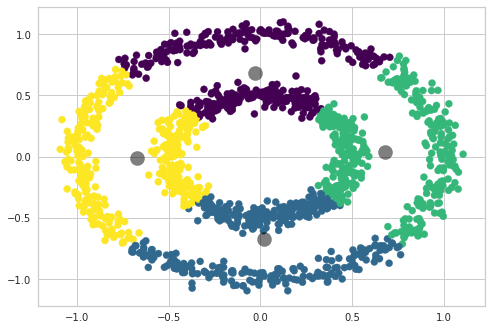

In [15]:

X = data_circles[1]
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)
y_kmeans = kmeans.predict(data_circles[1])

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

Como estamos usando K-Means, la primera observación es que hemos definido la cuantidad de clusters que tendremos, K = 4. 
Luego, los 4 centróides son definidos de una manera aleatoria donde quedan dentro del rango de valores de la muestra, pero distantes unos de los otros. 

Cada punto que está cerca de uno de los centroides es asignado al grupo del centroide con lo que llaman de "*initial grouping*". 

Entonces, encontramos el centro del "*data point*" y movemos el centroide para allí para otra vez asigñar todos los puntos de acuerdo con la distancia de cada uno de los centroides. El proceso se repite otra veces.

En mi punto de vista, queda claro visualmente que **habría que haber 2 grupos circulares** en vez de 4. Uno de los **principales inconvenientes de K-Means es su uso del valor medio para el centro del clúster** - entiendo que K-Means no puede manejar esto porque los valores medios de los clústeres están muy juntos.



### 2 b. Más allá de K-Means: algoritmos basados en densidad

En este apartado se pide aplicar clustering por densidad como [DBSCAN](https://en.wikipedia.org/wiki/DBSCAN) al dataset anterior para poder encontrar los dos clusters iniciales.

<br>
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> prueba la implementación de <a href="http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html">DBSCAN en scikit-learn</a> jugando con los parámetros <i>eps</i> y <i>min_samples</i> para encontrar las 2 estructuras subyacentes (y <i>outliers</i>).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

### 2 c. Más allá de K-Means: algoritmos jerárquicos

En este apartado se pide visualizar mediante un [dendrograma](https://en.wikipedia.org/wiki/Dendrogram) la construcción progresiva de los grupos mediante un algoritmo jerárquico aglomerativo (estrategia *bottom-up*). Con ello se pretende encontrar un método gráfico para entender el comportamiento del algoritmo y encontrar los dos clusters.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong><br>

prueba la implementación de <a href="https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html">clustering jerárquico de scipy</a> probando distintos <a href="https://en.wikipedia.org/wiki/Hierarchical_clustering#Linkage_criteria">criterios de enlace o <i>linkage</i></a> permimtiendo identificar los clusters subyacentes (mostrando su resultado) y su dendrograma.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> Interpreta el dendrograma y comenta qué criterio de enlace se ha comportado mejor. ¿Por qué?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué ha sucedido? Explica los motivos por los que crees que se ha producido ese resultado.  
</div>

### 2 d. *Feature engineering* y agrupamiento

Algunos de los algoritmos anteriores se basan en unas suposiciones que no cumplían en el dataset.
Muchas veces en lugar de optar por algoritmos más complejos o que requieren mayor cómputo, se pueden transformar los datos para poder aplicar con éxito técnicas más simples. Esto es un claro ejemplo de *feature engineering*.

<br>
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> transforma los puntos anteriores del dataset a un nuevo espacio de 2 dimensiones:
<ul>
<li>Radio, o distancia al punto (0,0)
<li>Ángulo,con respecto al vector (1,0)
</ul>
Para que todas las dimensiones tengan el mismo peso, además vamos a <a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html">normalizarlas entre 0 y 1 de acuerdo a su máximo y mínimo</a>.
<br>
Visualizar los puntos del "nuevo" dataset.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Qué crees que sucederá al aplicar los anteriores algoritmos en este "nuevo" dataset?
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> aplica cada uno de los algoritmos de agrupamimento anteriores que no hayan podido localizar adecuadamente los dos clusters originales para tratar de encontrarlos en este "nuevo" espacio. Ajusta los parámetros necesarios para facilitar su detección.
<br><br>
Para cada algoritmo, visualiza los clusters encontrados en 2 imágenes:
<ul>
<li> En el "nuevo" espacio (radio y ángulo).
<li> En el espacio original (posición x e y), pero NO con las etiquetas (pertenencia al cluster) obtenidas al aplicar los algoritmos sobre el dataset original, sino con las etiquetas obtenidas al realizar el clustering en el "nuevo" espacio. A ver si así se consiguen solventar los problemas iniciales.
</ul>
</div>

## 3. Reducción de dimensionalidad: PCA y t-SNE (1 punto)

Al plantear un problema de clasificación con un dataset de más de tres atributos (dimensiones), no se puede realizar una visualización clásica del dataset para entender los datos. Por ello, uno de los usos de los métodos de reducción de dimensionalidad es transformar los datos de más de 4 dimensiones a 3 o menos para poder visualizarlos.

### 3 a. PCA

El [dataset Iris](https://es.wikipedia.org/wiki/Iris_flor_conjunto_de_datos) contiene 4 atributos sobre tres tipos de flores.

In [ ]:
iris = datasets.load_iris()
X = iris.data   # np.array con shape (150, 4)
y = iris.target # np.array con shape (150,)

Al exceder las 3 dimensiones necesitaremos más de una visualización para entender los datos.

Para solucionarlo, una alternativa es usar los [*pair plots*](http://seaborn.pydata.org/generated/seaborn.pairplot.html) que enfrentan pares de dimensiones para tratar de dar una visión global a partir de un [DataFrame](https://pandas.pydata.org/pandas-docs/stable/dsintro.html):

In [ ]:
# DataFrame 
iris_df = pd.DataFrame(np.hstack([X, y.reshape(-1, 1)]), columns=iris.feature_names + ['species'])
sns.pairplot(iris_df, vars=iris.feature_names, hue="species")

Como alternativa a las múltiples gráficas que generan los gráficos pareados, se plantea utilizar una técnica de reducción de dimensionalidad para pasar de 4 dimensiones a 2. Nótese que gráficas como *longitud de pétalo* vs *anchura de pétalo* muestran cierta separabilidad (los 3 tipos de flores están aparentemente separados).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> realizar una reducción de dimensionalidad con PCA para pasar de 4 dimensiones a 2 y crear una visualización donde el color de los puntos dependa del tipo de flor a la que pertenece.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿El resultado de la reducción de dimensionalidad mantiene la separabilidad? ¿Era de esperar? ¿Por qué?
</div>

### 3 b. t-SNE (t-distributed Stochastic Neighbor Embedding)

El uso de técnicas de reducción de dimensionalidad es de gran utilidad cuando esta es muy alta. Por ejemplo, el [dataset Digits](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html) contiene 1797 imágenes de números del 0 al 9, de 8 por 8 píxeles. Si se toma cada pixel como una dimensión, eso se traduce en que cada muestra tiene ¡64 dimensiones!

In [ ]:
digits = datasets.load_digits()
X = digits.data   # np.array con shape (1797, 64)
y = digits.target # np.array con shape (1797,)

Ejemplo de los 24 primeros dígitos de 8 por 8 píxeles junto a su etiqueta presentes en el dataset:

In [ ]:
fig, ax = plt.subplots(3, 8, figsize=(12, 5))
for i, axis in zip(range(24), ax.reshape(-1)):
    axis.imshow(X[i,:].reshape(8, 8), cmap='gray')
    axis.set_title('#{}'.format(y[i]))
plt.tight_layout()

Con un número tan elevado de dimensiones pierde sentido visualizar el dataset con un *pair plot* y aparecen otros peligos como la [maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n).
Para reducir su dimensión y así entender la estructura de los datos en alta dimensionalidad existen distintas alternativas con resultados muy distintos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> realizar una reducción de dimensionalidad con PCA para pasar de 64 dimensiones a 2 y crear una visualización donde el color de los puntos dependa del dígito que pertenece.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿El resultado de la reducción de dimensionalidad mantiene la separabilidad? ¿Era de esperar? ¿Por qué?
</div>

El algoritmo [t-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) ideado por [van der Maaten y Hinton](https://lvdmaaten.github.io/tsne/) difiere de PCA en que no trata de maximizar la varianza explicada. Intuitivamente, t-SNE trata de que la vecindad de un punto en baja dimensionalidad sea la misma que la original. Partiendo de una localización aleatoria de cada punto, corrige su posición de forma iterativa tratando de minimizar la distancia a sus vecinos originales hasta converger.

Para ello, t-SNE dispone de diversos [parámetros](https://distill.pub/2016/misread-tsne/) que pueden modificar drásticamente el resultado. Por lo que se recomienda conocer su funcionamiento antes de aplicar la técnica.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> realizar una reducción de dimensionalidad con t-SNE para pasar de 64 dimensiones a 2 y crear una visualización donde el color de los puntos dependa del dígito que pertenece.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿El resultado de la reducción de dimensionalidad mantiene la separabilidad? ¿Era de esperar? ¿Por qué?
</div>

## 4. Aplicación: Agrupación de documentos (3 puntos)

### 4 a. Carga y limpieza de datos

En este problema se utilizará el dataset [*20 news group*](https://archive.ics.uci.edu/ml/machine-learning-databases/20newsgroups-mld/20newsgroups.data.html), con 20 categorías de textos, de los cuales se seleccionarán 3. El objetivo es encontrar grupos de textos (preferiblemente de la misma categoría) a través de sus palabras.

El primer apartado consiste en cargar el dataset y limpiar los datos (tarea que normalmente tiene una carga entre el 70 y 80% del tiempo), en este caso los textos.

In [ ]:
data = datasets.fetch_20newsgroups(categories=['rec.autos', 'rec.sport.baseball', 'soc.religion.christian'])
texts, targets = data['data'], data['target']

Donde ```texts``` es una lista con los artículos y ```targets``` es un vector con el índice de la categoría a la que pertenece cada texto.

La limpieza de texto debe convertir:

In [ ]:
print(data['data'][1])

En algo muy parecido a:

```In previous article UUCP wharfie says In article centerline com com Jim Frost writes larger engine That's what the SHO is slightly modified family sedan with powerful engine They didn't even bother improving the *brakes That shows how much you know about anything The brakes on the SHO are very different inch or forget discs all around vented in front The normal Taurus setup is smaller discs front drums rear one saw had vented rears too it was on lot of course the sales man was fool titanium wheels yeah right then later told me they were magnesium more believable but still crap since Al is so uch cheaper and just as good tend to agree tho that this still doesn't take the SHO up to standard for running 130 on regular basis The brakes should be bigger like 11 or so take look at the ones on the Corrados where they have braking regulations DREW```

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> limpia los textos de entrada:
<ul>
<li> Elimina las líneas de encabezado.
<li> Los signos de puntuación.
<li> Los corchetes, paréntesis y angulares.
<li> Los saltos de línea.
<li> Exclamaciones e interrogaciones.
<li> Los tokens e-mails y de longitud 1. 
<li> Los espacios en blanco consecutivos.
</ul>
</div>

### 4 b. Conversión de textos a vectores

Para encontrar grupos entre los textos, es necesario convertir cada texto en un vector.
Existen multitud de maneras de hacerlo, una de ellas es aplicar [TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) con scikit-learn [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Transformando la lista de textos en una [matriz dispersa](https://docs.scipy.org/doc/scipy/reference/sparse.html) con tantas filas como artículos y tantas columnas como palabras.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> transforma los textos a vectores con TF-IDF.

Para reducir el número de columnas en la matriz evita las *stop words* en inglés y convierte los textos a minúsculas.
</div>

### 4 c. Reducción de dimensionalidad

Para visualizar y encontrar los grupos, se reducirá la dimensionalidad de la matriz anterior. De tal forma que el número de columnas se reducirá a 2 (el número de filas se mantiene, ya que cada fila es un documento).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> utiliza t-SNE para reducir la dimensionalidad de <i>n</i> columnas (palabras) a 2 dimensiones. Utiliza un tamaño de perplejidad alto para aumentar la vecindad (en torno a 100).
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> visualiza mediante un scatter plot los puntos en 2 dimensiones con un color para cada clase.
</div>

### 4 d. Encuentra los grupos de artículos con distintos algoritmos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> utiliza <i>k-means</i> (con <i>k=3</i>) para tratar de encontrar los 3 grupos de artículos y visualiza el resultado.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Ha localizado los 3 grupos originales? (el color no tiene porque coincidir, solo nos importa la forma) ¿Por qué?
</div>

Para agrupar los textos tratando de situar los centroides en las regiones más densas, [Mean-Shift](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) sigue un camino desde cualquier punto del espacio guiándose por la densidad de puntos hasta alcanzar un máximo local (dentro de su <i>bandwidth</i>).

<br>
<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementación:</strong> utiliza <i>Mean-Shift</i> (variando en <i>bandwidth</i>) hasta encontrar 3 grupos y visualiza el resultado.
</div>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> ¿Ha localizado los 3 grupos originales? (el color no tiene porque coincidir, solo nos importa la forma) ¿Por qué?
</div>